Cho một bộ data MNIST bao gồm 60000 ngàn ảnh để huấn luyện 28 * 28 chữ số viết tay. 
Tiến hành xây dựng mạng này bao gồm 
- 1 lớp Conv cỡ 3 * 3 bao gồm 32 kernels
- 1 lớp Max Pooling cỡ 2 * 2
- 1 lớp duỗi Flatten
- 1 lớp Dense 128
- 1 lớp Dense 10

Bạn hay huấn luyện model đến khi nào độ chính xác lên đến 99.8 % nhé

Giới thiệu về dữ liệu

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
import matplotlib.pyplot as plt

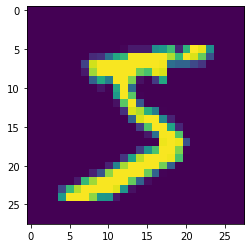

In [3]:
plt.imshow(training_images[0])

In [4]:
training_images.shape

(60000, 28, 28)

In [5]:
training_images[0].shape

(28, 28)

In [7]:
training_labels[0]

5

In [8]:
# Chuẩn hóa lại dữ liệu bằng cách chia các giá trị của pixel cho 255.0
train_X = training_images.astype("float") / 255.0
test_X = test_images.astype("float") / 255.0
train_Y = training_labels




In [9]:
# Sử dụng test_images, test_labels để làm tập validation
valid_X = test_X
valid_Y = test_labels

In [12]:
import numpy as np

# increase dimension
# train_X = np.expand_dims(training_images.astype("float") / 255.0, 3)
# valid_X = np.expand_dims(test_X, 3)
train_X = train_X.reshape(60000, 28, 28 ,1)
valid_X = test_X.reshape(10000, 28, 28 ,1)

In [ ]:
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()

# # Chuẩn hóa labels theo binary
# train_Y = lb.fit_transform(training_labels)
# valid_Y = lb.fit_transform(test_labels)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [14]:
# Khởi tạo model
model = Sequential()

In [15]:
width = 28
height = 28
classes = 10
shape = (width,height, 1)

In [16]:
# Thêm một lớp tích chập + lớp Activation: relu
model.add(Conv2D(28, (3 , 3), padding='same', input_shape=shape))
model.add(Activation("relu"))

In [17]:
# Thêm một lớp Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Thêm một lớp duỗi
model.add(Flatten())

# Thêm một lớp Dense 128 + lớp Activation: relu
model.add(Dense(128))
model.add(Activation("relu"))

# Thêm một lớp Dense 10 + lớp Activation: Softmax
model.add(Dense(10))
model.add(Activation("softmax"))

In [18]:
# Chú ý thêm lớp Activation Softmax
# Kiểm tra lại mô hình

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 28)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5488)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               702592    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
# Thêm một hàm tối ưu cho model
# learning_rate = 1e-2
# batch_size = 64
# num_epochs = 30 # Accuracy: 74% within 30 epochs

# aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")
# opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# import numpy as np
# flow = aug.flow(train_X, train_Y, batch_size=batch_size)

In [21]:
# Tiến hành training

print("Start Training...")
H = model.fit(train_X, train_Y, validation_data=(valid_X, valid_Y), epochs=10)

Start Training...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1520 - accuracy: 0.9547 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 3/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0425 - val_accuracy: 0.9850
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0500 - val_accuracy: 0.9844
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0423 - val_accuracy: 0.9853
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0477 - val_accuracy: 0.9857
Epoch 7/10
60000/60000 [=============